# Class 2: Neural Networks

## Preliminaries

Run the cell below to download the course library.

In [1]:
import gdown

gdown.download(id='1SzvuBYIZ407c9eOChXD48NG94v7azJby')

Downloading...
From (original): https://drive.google.com/uc?id=1SzvuBYIZ407c9eOChXD48NG94v7azJby
From (redirected): https://drive.google.com/uc?id=1SzvuBYIZ407c9eOChXD48NG94v7azJby&confirm=t&uuid=adf1defc-2e9b-47b0-9d77-de351127fa53
To: /content/sdx.py
100%|██████████| 2.83k/2.83k [00:00<00:00, 7.85MB/s]


'sdx.py'

Run the cell below to import the class modules.

If you get import warnings, try using **`Ctrl+M .`** to restart the kernel. *(notice there is a dot there)*

In [2]:
from tensorflow import keras
from sdx import *

## Loading the MNIST dataset

The [MNIST dataset](http://yann.lecun.com/exdb/mnist/) is a famous database of handwritten digits.

In [67]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

The variable `train_images` is an array of 60000 images that should be used as training data. Below, we see the tenth image.

In [4]:
cv_imshow(train_images[9])

The variable `train_labels` is an array of 60000 integers, which are the respective labels of these images. These integers were obtained manually, so they are reliable to use as groundtruth. Below, we see the label of the tenth image.

In [5]:
train_labels[9]

4

The variable `test_images` is an array of 10000 images that should be used as test data.

In [6]:
cv_imshow(test_images[-1])

Finally, the variable `test_labels` is an array of 10000 integers, which are the respective labels.

In [7]:
test_labels[-1]

6

To show more than one image at once, we can call the `cv_gridshow` function, passing the array and the parameters of a slice. Below, we show the 25 images that correspond to the `train_images[10:35]` slice.

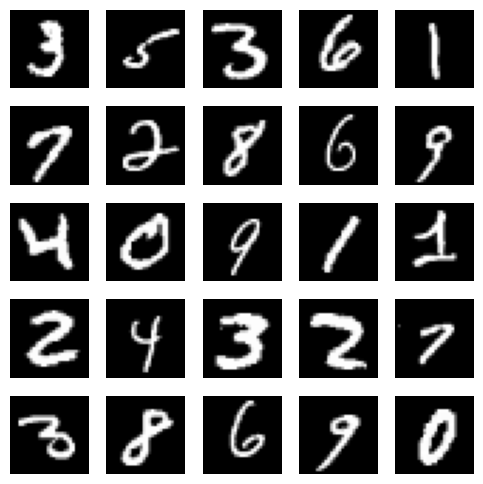

In [8]:
cv_gridshow(train_images, start=10, stop=35)

It is possible to show the labels alongside the images.

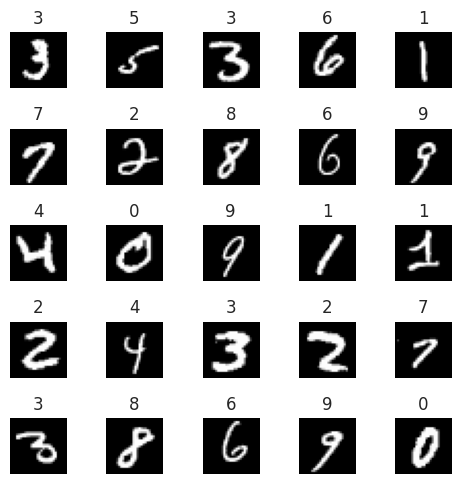

In [9]:
cv_gridshow(train_images, start=10, stop=35, labels=train_labels)

The default value for `start` is `0` and the default value for `stop` is `9`. This is important because the processing happens in Google servers but the rendering still happens in your machine. If you accidentally tried to show 60000 images at once, your browser would probably die horribly.

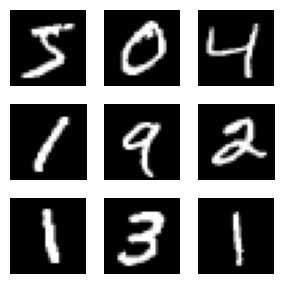

In [10]:
cv_gridshow(train_images)

## Building neural networks

Let's build a first neural network. More accurately, let's *demonstrate the foundations of building a neural network.* The actual model we will build is so trivial that we can't really call it an actual neural network, since it will have no hidden layers. *(we will properly discuss the concept of hidden layers in future classes)*

Firstly, let's reshape the training images and testing images. The dataset is available as 2D arrays, but the model expects 1D arrays, so we must concatenate the image rows to turn the 28x28 arrays into 1x784 arrays.

In [68]:
train_images = train_images.reshape(60000, 784)
test_images = test_images.reshape(10000, 784)

Then, let's build the *input layer,* calling the `keras.Input` constructor. It obviously needs to know the size of the inputs.

In [12]:
inputs = keras.Input(shape=(784,))

Finally, let's build the *output layer,* which will always be a *dense layer* in our networks *(we will properly discuss the concept of dense layers in future classes).* We do this by calling the `keras.layers.Dense` constructor. Since we are building a *categorical* classifier, it needs to know the number of categories, which is the number of possible digits.

In [13]:
layer = keras.layers.Dense(10)

This constructor actually returns a function. In order to obtain the actual layer, we need to call this function.

In [14]:
outputs = layer(inputs)

We now have what we need to compile the model. We won't delve into the details today, but the parameters below are necessary to ensure that an adequate model for our problem is compiled.

In [15]:
def compile_model(inputs, outputs):
  model = keras.Model(inputs, outputs)
  model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
  )
  return model

In [16]:
model = compile_model(inputs, outputs)

To confirm that the model is structured as expected, we can call the `model.summary` method.

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Now we are ready to train our model, calling `model.fit`...

In [18]:
model.fit(train_images, train_labels);

1875/1875 [==============================] - 4s 2ms/step - loss: 9.7944 - sparse_categorical_accuracy: 0.8390


...and test it, calling `model.evaluate`.

In [19]:
model.evaluate(test_images, test_labels);

313/313 [==============================] - 1s 3ms/step - loss: 6.5248 - sparse_categorical_accuracy: 0.8733


A more detailed evaluation of the model can be seen via the *confusion matrix.*

313/313 [==============================] - 1s 2ms/step


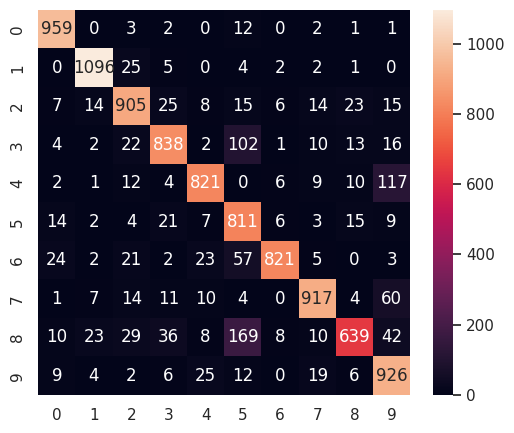

In [20]:
plot_confusion(model, test_images, test_labels)

## Building a single-layer neural network

Let's now build an actual neural network with a single hidden layer. We'll keep the current values of `train_images`, `train_labels`, `test_images`, `test_labels`, and `inputs`, but will use a two-step process to build `outputs`.

The first step is to build a dense layer from the input. This will be our hidden layer. The choice of `397` neurons *(we will properly discuss... okay, I think you already got the point)* is completely arbitrary and just for the sake of example.

The second step is building the output layer, like we did for the previous model. Notice that the `inputs` variable is used only in the first step. In the second step (and all subsequent steps, if we had more hidden layers), we reuse the `outputs` variable. We can think of this as a gradual refinement of the data, until it reaches the output layer.

In [21]:
layer = keras.layers.Dense(397)
outputs = layer(inputs)

layer = keras.layers.Dense(10)
outputs = layer(outputs)

model = compile_model(inputs, outputs)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 397)               311645    
                                                                 
 dense_2 (Dense)             (None, 10)                3980      
                                                                 
Total params: 315625 (1.20 MB)
Trainable params: 315625 (1.20 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


313/313 [==============================] - 1s 2ms/step


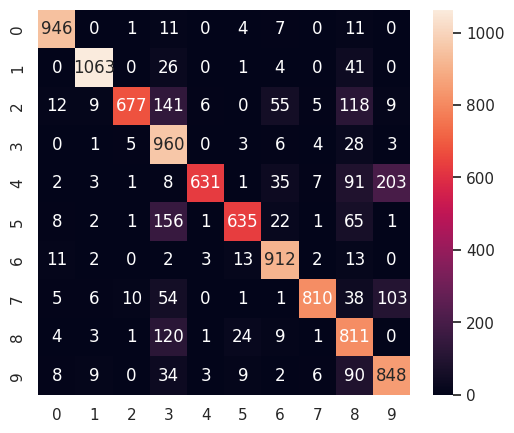

In [22]:
model.fit(train_images, train_labels)

model.evaluate(test_images, test_labels)

plot_confusion(model, test_images, test_labels)

## Experimenting with neural network parameters

* What happens when you add more layers?

* What happens when you add layers with less neurons?

* What happens when you add layers with more neurons?

* What happens when you add `activation='relu'` to the `keras.layers.Dense` constructor?

And now it's your turn! Do whatever you want in an attempt to improve the results.

You can check sites like the [API reference](https://keras.io/api/layers/), but I won't help you. Just try to do your best by yourself.

In [65]:
layer = keras.layers.Dense(397)
outputs = layer(inputs)

layer = keras.layers.Dense(10)
outputs = layer(outputs)

model = compile_model(inputs, outputs)

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_16 (Dense)            (None, 397)               311645    
                                                                 
 dense_17 (Dense)            (None, 10)                3980      
                                                                 
Total params: 315625 (1.20 MB)
Trainable params: 315625 (1.20 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


313/313 [==============================] - 1s 2ms/step


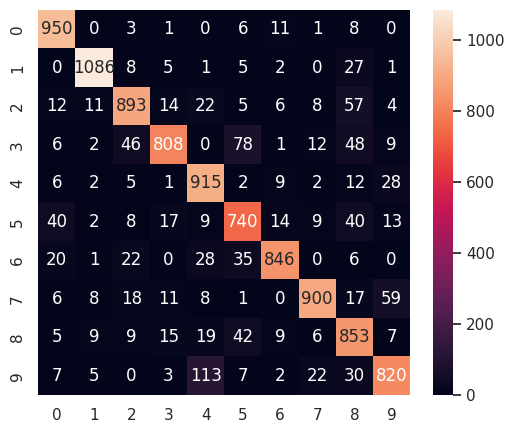

In [24]:
model.fit(train_images, train_labels)

model.evaluate(test_images, test_labels)

plot_confusion(model, test_images, test_labels)

You can click on the toc.png tab to the left to browse by section.

#Tentativa 1: aumentar camada e usar funcao de ativacao relu

In [69]:
layer = keras.layers.Dense(500, activation="relu")
outputs = layer(inputs)

layer = keras.layers.Dense(10)
outputs = layer(outputs)

model = compile_model(inputs, outputs)

model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_20 (Dense)            (None, 500)               392500    
                                                                 
 dense_21 (Dense)            (None, 10)                5010      
                                                                 
Total params: 397510 (1.52 MB)
Trainable params: 397510 (1.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


313/313 [==============================] - 1s 3ms/step


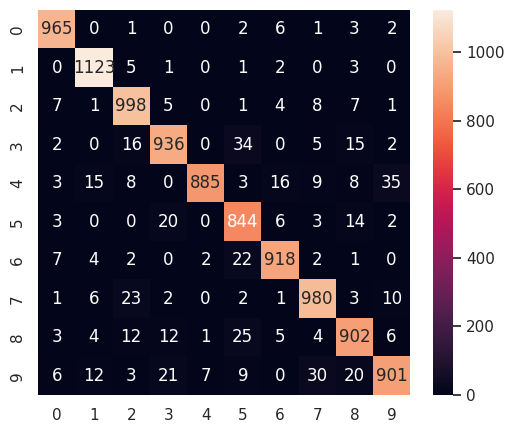

In [70]:
model.fit(train_images, train_labels)

model.evaluate(test_images, test_labels)

plot_confusion(model, test_images, test_labels)